# Análisis de los datos

## Importaciones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from src.cleaning_functions import *

In [3]:
sharks = pd.read_csv("./data/shark_attacks.csv",encoding = "ISO-8859-1")
sharks['date'] = pd.to_datetime(sharks['date'], format="%Y-%m-%d")
sharks["year"] = sharks.date.dt.year.astype(str).apply(lambda x: np.nan if x=="nan"  else int(x.split(".")[0]))
sharks["month"] = sharks.date.dt.month.astype(str).apply(lambda x: np.nan if x=="nan"  else int(x.split(".")[0]))

In [4]:
sharks.sample(5)

,date,hour,country,sex,age,activity,species,type,injury,year,month
2168,1998-08-01,NaN,South Africa,M,19.0,surf,white shark,Provoked,injury,1998.0,8.0
3410,1969-01-27,07:00:00,Australia,M,21.0,diving,NaN,Provoked,injury,1969.0,1.0
5387,1902-11-01,NaN,United States of America,M,NaN,fishing,NaN,Provoked,injury,1902.0,11.0
1838,2002-07-20,17:00:00,United States of America,F,15.0,swimming,bull shark,Provoked,injury,2002.0,7.0
2389,1995-03-05,12:00:00,Brazil,NaN,NaN,swimming,NaN,Provoked,fatal,1995.0,3.0


## Ataques por año en función de si son o no mortales

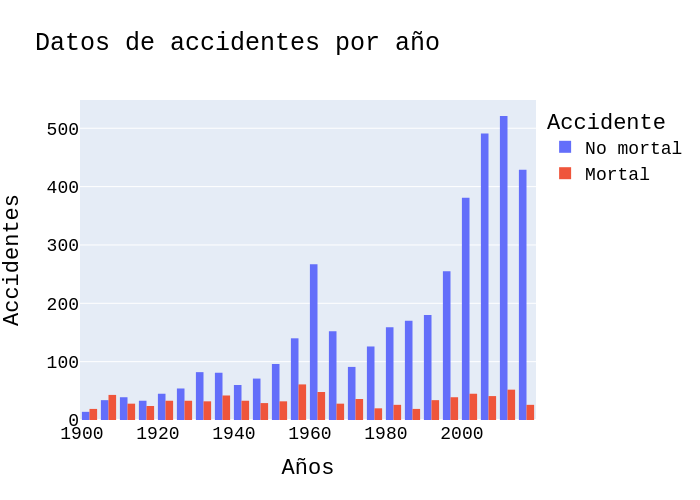

In [5]:
muertes_por_año_division = go.Figure()

muertes_por_año_division.add_trace(
    go.Histogram(
        x=sharks[(sharks.year > 1900) & ((sharks["injury"]=="injury") | (sharks["injury"]=="no injury"))].year
        ,name="No mortal"))

muertes_por_año_division.add_trace(
    go.Histogram(
        x=sharks[(sharks.year > 1900) & (sharks["injury"]=="fatal")].year
        ,name="Mortal"))

muertes_por_año_division.update_layout(
    title="Datos de accidentes por año",
    xaxis_title="Años",
    yaxis_title="Accidentes",
    legend_title="Accidente",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"
    )
)

muertes_por_año_division.show("png")
muertes_por_año_division.write_html("./images/muertes_por_año_division.html")

Puedes ver la figura interactiva haciendo click [aquí](https://nbviewer.org/github/rodrigogalan/data-cleaning-pandas/blob/a46d57bf1e3f15bedd607b1379aa666d30dd8585/images/muertes_por_a%C3%B1o_division.html)

Los datos nos dicen que hay un mayor número de ataques registrados por año, esto se puede deber a un aumento de la población o a un incremento de los esfuerzos para el registro de los ataques, pero aunque el número de ataques registrados haya aumentado, los casos de ataques registrados donde hay víctimas mortales han descendido.

## Ataques por mes en función del sexo en EEUU

In [6]:
grafico_paises = list(sharks[(sharks["year"].notna())]["country"].value_counts().head(5).keys())

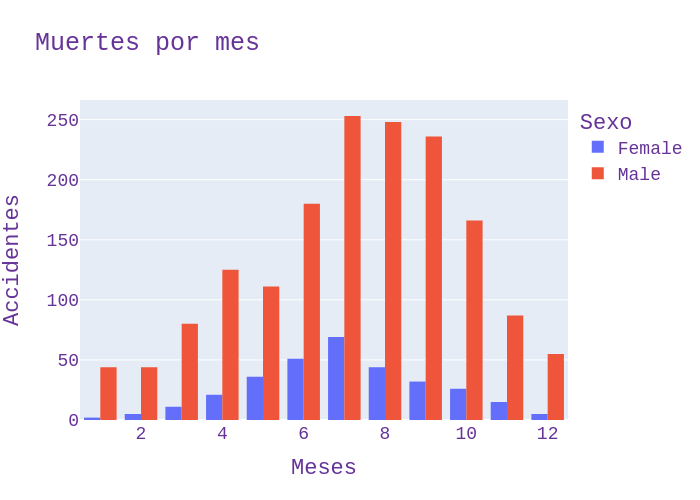

In [7]:
muertes_por_mes = go.Figure()

muertes_por_mes.add_trace(
    go.Histogram(
        x=sharks[(sharks.year>1800)&(sharks.country=="United States of America")&(sharks.sex.notna())&(sharks.sex=="F")]["month"]
        ,name="Female"))

muertes_por_mes.add_trace(
    go.Histogram(x=sharks[(sharks.year>1800)&(sharks.country=="United States of America")&(sharks.sex.notna())&(sharks.sex=="M")]["month"]
                 ,name="Male"))


muertes_por_mes.update_layout(
    title="Muertes por mes",
    xaxis_title="Meses",
    yaxis_title="Accidentes",
    legend_title="Sexo",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

muertes_por_mes.show("png")
muertes_por_mes.write_html("./images/muertes_por_mes.html")

Puedes ver la figura interactiva haciendo click [aquí](https://nbviewer.org/github/rodrigogalan/data-cleaning-pandas/blob/a46d57bf1e3f15bedd607b1379aa666d30dd8585/images/muertes_por_mes.html)

Se puede ver como en EEUU, en cualquier mes del año, las víctimas de ataques de tiburón son mayoritariamente hombres. También se puede ver como se distribuyen los ataques de tiburon en función del mes, siendo más numerosos en los meses de verano que en los de invierno; esto puede deberse a una mayor presencia de gente en las playas en los meses más calurosos.

## Ataques por año en función del sexo en EEUU 

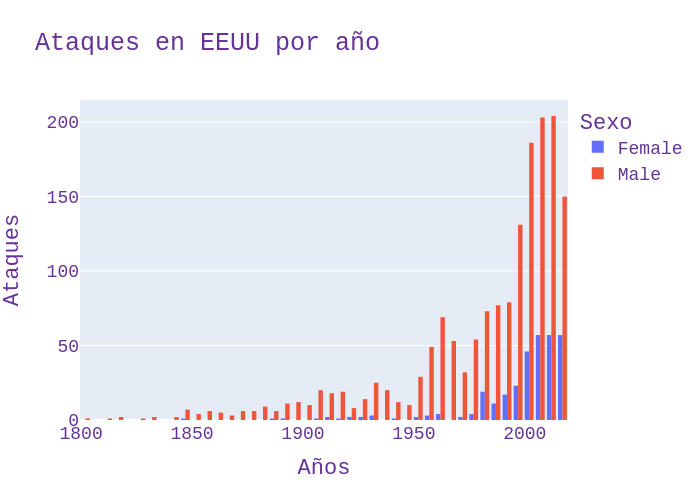

In [ ]:
ataques_EEUU = go.Figure()

ataques_EEUU.add_trace(
    go.Histogram(
        x=sharks[(sharks.year>1800)&(sharks.country=="United States of America")&(sharks.sex.notna())&(sharks.sex=="F")]["year"]
        ,name="Female"))

ataques_EEUU.add_trace(
    go.Histogram(x=sharks[(sharks.year>1800)&(sharks.country=="United States of America")&(sharks.sex.notna())&(sharks.sex=="M")]["year"]
                 ,name="Male"))


ataques_EEUU.update_layout(
    title="Ataques en EEUU por año",
    xaxis_title="Años",
    yaxis_title="Ataques",
    legend_title="Sexo",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

ataques_EEUU.show("png")
ataques_EEUU.write_html("./images/ataques_EEUU.html")

Puedes ver la figura interactiva haciendo click [aquí](https://nbviewer.org/github/rodrigogalan/data-cleaning-pandas/blob/a46d57bf1e3f15bedd607b1379aa666d30dd8585/images/ataques_EEUU.html)

Se puede observar como los hombres tienen un mayor registro de ataques por tiburón en relación a las mujeres. También se puede observar como el número de ataques registrados a ido aumentando a lo largo de los años, exceptuando el último año, cosa que puede deberse a que los datos de ese año no se han terminado de recoger.

## Ataques en función del país

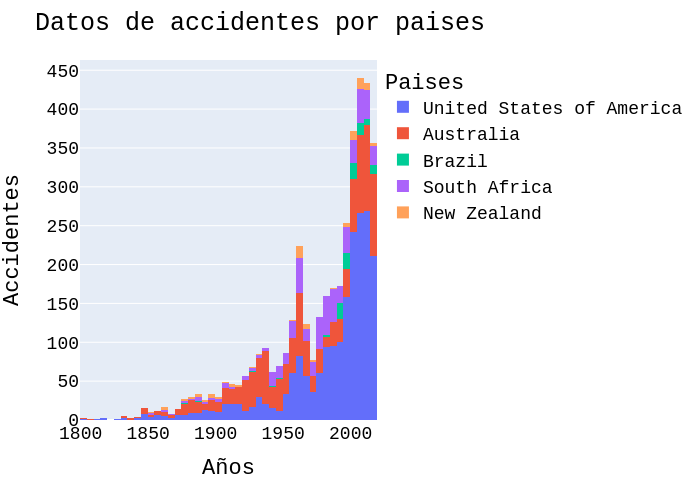

<Figure size 1080x288 with 0 Axes>

In [8]:
muertes_por_pais = plt.figure(figsize=(15,4))
muertes_por_pais = px.histogram(
    sharks, x=sharks[(sharks.year>1800)&(sharks.country.notna())&(sharks.country.isin(grafico_paises))]["year"],
    color=sharks[(sharks.year>1800)&(sharks.country.notna())&(sharks.country.isin(grafico_paises))]["country"]
)

muertes_por_pais.update_layout(
    title="Datos de accidentes por paises",
    xaxis_title="Años",
    yaxis_title="Accidentes",
    legend_title="Paises",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"
    )
)
muertes_por_pais.show("png")
muertes_por_pais.write_html("./images/muertes_por_pais.html")

Puedes ver la figura interactiva haciendo click [aquí](https://nbviewer.org/github/rodrigogalan/data-cleaning-pandas/blob/a46d57bf1e3f15bedd607b1379aa666d30dd8585/images/muertes_por_pais.html)

Se puede observar en este gráfico el número de ataques por tiburón en función del año en los paises que mayor cantidad de ataques registran

## Datos de muertes por actividad

In [10]:
actividades = list(sharks[(sharks["injury"].notna())]["activity"].value_counts().keys())

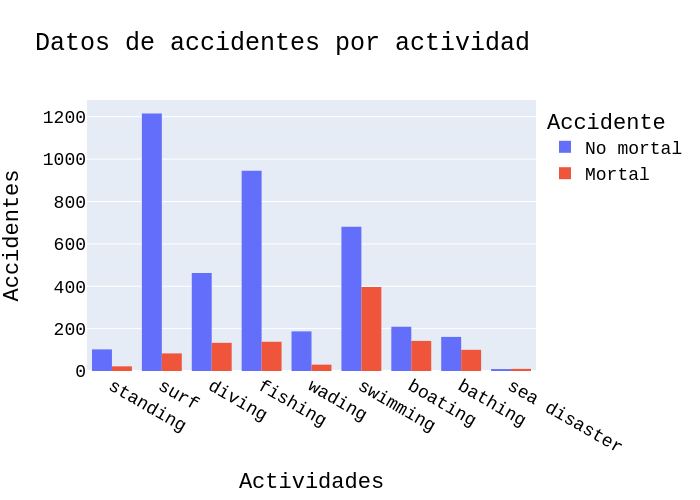

In [11]:
activity = go.Figure()

activity.add_trace(
    go.Histogram(
        x=sharks[(sharks.activity.notna())&((sharks["injury"]=="injury") | (sharks["injury"]=="no injury"))]["activity"]
        ,name="No mortal"))

activity.add_trace(
    go.Histogram(
        x=sharks[(sharks.activity.notna())&(sharks["injury"]=="fatal")]["activity"]
        ,name="Mortal"))

activity.update_layout(
    title="Datos de accidentes por actividad",
    xaxis_title="Actividades",
    yaxis_title="Accidentes",
    legend_title="Accidente",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"
    )
)

activity.show("png")
activity.write_html("./images/activity.html")

Puedes ver la figura interactiva haciendo click [aquí](https://nbviewer.org/github/rodrigogalan/data-cleaning-pandas/blob/a46d57bf1e3f15bedd607b1379aa666d30dd8585/images/activity.html)

In [35]:
for e in ["standing", "surf", "diving", "fishing", "wading", "swimming", "boating", "bathing", "sea disaster"]:
    mortales = sharks[(sharks.activity==e) & (sharks["injury"]=="fatal")].shape[0]
    totales = sharks[(sharks.activity==e)].shape[0]
    print(f"El porcentaje de ataques mortales practicando la actividad {e} es: {round(mortales/totales,2)}%")

El porcentaje de ataques mortales practicando la actividad standing es: 0.18%
El porcentaje de ataques mortales practicando la actividad surf es: 0.06%
El porcentaje de ataques mortales practicando la actividad diving es: 0.22%
El porcentaje de ataques mortales practicando la actividad fishing es: 0.13%
El porcentaje de ataques mortales practicando la actividad wading es: 0.14%
El porcentaje de ataques mortales practicando la actividad swimming es: 0.36%
El porcentaje de ataques mortales practicando la actividad boating es: 0.39%
El porcentaje de ataques mortales practicando la actividad bathing es: 0.38%
El porcentaje de ataques mortales practicando la actividad sea disaster es: 0.43%


Se puede comprobar como de todas las actividades, la actividad que mayor cantidad de atques no mortales ha registrado es el surf; mientras que la que más cantidad de ataques mortales ha registrado es la pesca. Pero la que registra un mayor porcentaje de ataques mortales es el accidente marítimo.